In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_date'] = df['job_posted_date'].dt.date
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\foranac\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_Irl_DA = df[(df['job_country']== 'Ireland') & (df['job_title_short']=='Data Analyst')].copy()
sns.set_theme(style='ticks')

Text(0.5, 1.0, 'Counts of Job Locations for Data Analyst in Ireland')

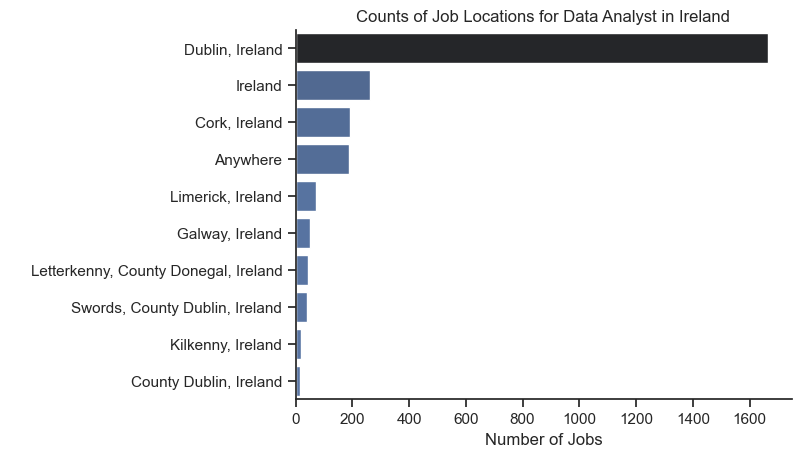

In [3]:
df_plot = df_Irl_DA['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count',y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.set_theme(style='ticks')
sns.set_style("ticks")
sns.despine()
plt.ylabel(' ')
plt.xlabel('Number of Jobs')
plt.title('Counts of Job Locations for Data Analyst in Ireland')




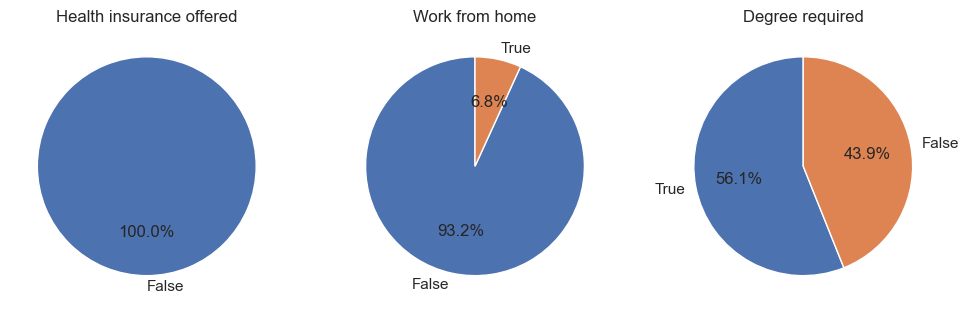

In [4]:
pie_dict = {
    'job_health_insurance' : 'Health insurance offered',
    'job_work_from_home' :  'Work from home',
    'job_no_degree_mention' : 'Degree required'
}
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))
for i, (column,title) in enumerate(pie_dict.items()):
    labels = df_Irl_DA[column].value_counts().index.astype(str)
    ax[i].pie(df_Irl_DA[column].value_counts(), autopct='%1.1f%%' , startangle=90,labels=labels)
    ax[i].set_title(title)


Text(0.5, 1.0, 'Counts of Company Appearing in Job Postings')

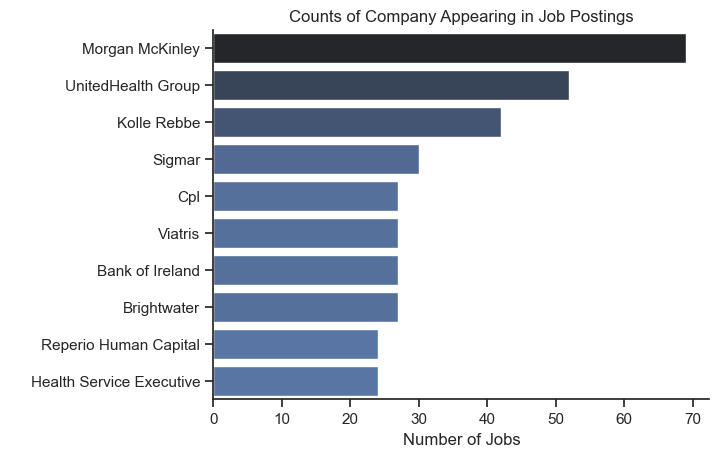

In [5]:
df_plot = df_Irl_DA['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count',y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.set_theme(style='ticks')
sns.set_style("ticks")
sns.despine()
plt.ylabel(' ')
plt.xlabel('Number of Jobs')
plt.title('Counts of Company Appearing in Job Postings')

